In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import torch
from models import AlexNet
from torch.autograd import Variable

import warnings
warnings.simplefilter("ignore")


# Detect all faces in an image
# load in a haar cascade cassifier fro detecting frontal faces
# face_cascade = cv2.CascadeClassifier(
#     './detectors/haarcascade_frontalface_default.xml')


net = AlexNet()
# loading the best saved model parameters
net.load_state_dict(torch.load(
    './saved_models/keypoints_model.pth'))

# perepate the net for testing mode
net.eval()


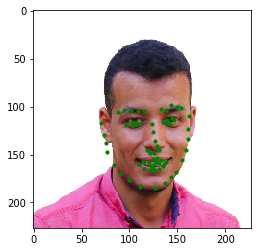

In [233]:

image = cv2.imread('imgs/b.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (227, 227))
image_copy = np.copy(image)





def show_all_keypoints(image, keypoints):
    """
    Visuzlizing the image and the keypoints on it.
    """
    #plt.figure(figsize=(5, 5))

    plt.imshow(image)
    plt.scatter(keypoints[:, 0], keypoints[:, 1], s=40, marker='.', c='g')
    plt.savefig('fig2.png')
    plt.show()





# convert to grayscale
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Normalize the grayscale image
image = image/255.0

# rescale the detected face to be the expected square size
image = cv2.resize(image, (227, 227))

image = np.expand_dims(image, 0)
image = np.expand_dims(image, 0)

img_torch = Variable(torch.from_numpy(image))

img_torch = img_torch.type(torch.FloatTensor)

keypoints = net(img_torch)

keypoints = keypoints.data.numpy()
# Becuase of normalization, keypoints won't be placed if they won't reutrn to values before noramlization
keypoints = keypoints * 50.0 + 100
# reshape to 2 X 68 keypoint for the fase
keypoints = np.reshape(keypoints, (68, -1))

show_all_keypoints(image_copy, keypoints)







## Adding Sunglasses

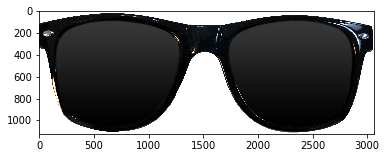

In [234]:
# load in the sunglasses image with cv2 and IMREAD_UNCHANGED
sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)
plt.imshow(sunglasses)

In [235]:
# top-left location for sunglasses to go
# 17 = edge of left eyebrow
x = int(keypoints[17, 0])
y = int(keypoints[17, 1])


In [236]:
# height and width of sunglasses
# h = length of nose
h = int(abs(keypoints[27, 1] - keypoints[34, 1]))+3
# w = left to right eyebrow edges
w = int(abs(keypoints[17, 0] - keypoints[26, 0]))+3

In [237]:
# read in sunglasses
sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)
# resize sunglasses
new_sunglasses = cv2.resize(sunglasses, (w, h), interpolation=cv2.INTER_CUBIC)

# get region of interest on the face to change
roi_color = image_copy[y:y+h, x+5:x+w+5]

# find all non-transparent pts
ind = np.argwhere(new_sunglasses[:, :, 3] > 0)


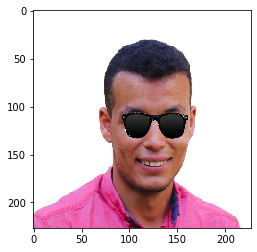

In [238]:
# for each non-transparent point, replace the original image pixel with that of the new_sunglasses
for i in range(3):
    roi_color[ind[:, 0], ind[:, 1],
              i] = new_sunglasses[ind[:, 0], ind[:, 1], i]
# set the area of the image to the changed region with sunglasses
image_copy[y:y+h, x+5:x+w+5] = roi_color


# display the result!
plt.imshow(image_copy)
plt.savefig('fig1.png')
plt.show()

## Adding Hat

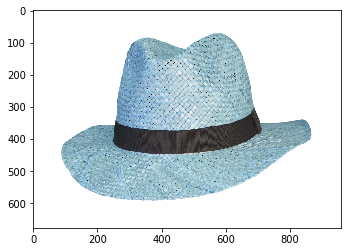

In [244]:
# load in the hat image with cv2 and IMREAD_UNCHANGED
sunglasses = cv2.imread('images/straw_hat.png', cv2.IMREAD_UNCHANGED)
plt.imshow(sunglasses)

In [240]:
# set the x, y of the hat
x = int(keypoints[18, 0]) - 78
y = int(keypoints[18, 1]) - 100

In [241]:
# height and width of the hat
h = 130
w = 210

In [242]:
# read in the hat
sunglasses = cv2.imread('images/straw_hat.png', cv2.IMREAD_UNCHANGED)
# resize the hat
new_sunglasses = cv2.resize(sunglasses, (w, h), interpolation=cv2.INTER_CUBIC)

# get region of interest on the face to change
roi_color = image_copy[y:y+h, x:x+w]

# find all non-transparent pts
ind = np.argwhere(new_sunglasses[:, :, 3] > 0)


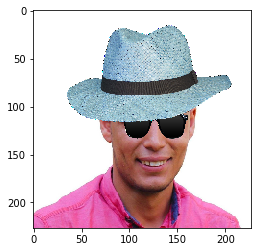

In [243]:
for i in range(3):
    roi_color[ind[:, 0], ind[:, 1],
              i] = new_sunglasses[ind[:, 0], ind[:, 1], i]
# set the area of the image to the changed region with hat
image_copy[y:y+h, x:x+w] = roi_color


# display the result!
plt.imshow(image_copy)
plt.savefig('fig3.png')
plt.show()